# Linear Regression 
 

## Linear Regression   using Least Squares
In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. In the case of one independent variable it is called simple linear regression. For more than one independent variable, the process is called mulitple linear regression. We will be dealing with simple linear regression in this tutorial.  
Let **X** be the independent variable and **Y** be the dependent variable. We will define a linear relationship between these two variables as follows:  

\\[ Y = mX + c \\]  
 

## Finding the Error  

  
\\[ L(x) = \sum_{i=1}^n (y_i - p_i)^2\\]  
  
  


## Least Squares method  

  
\\[m = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^n (x_i - \bar x)^2}\\]  
  
\\[c = \bar y - m\bar x\\]  
  



## Implementing the Model

In [30]:
# Making imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

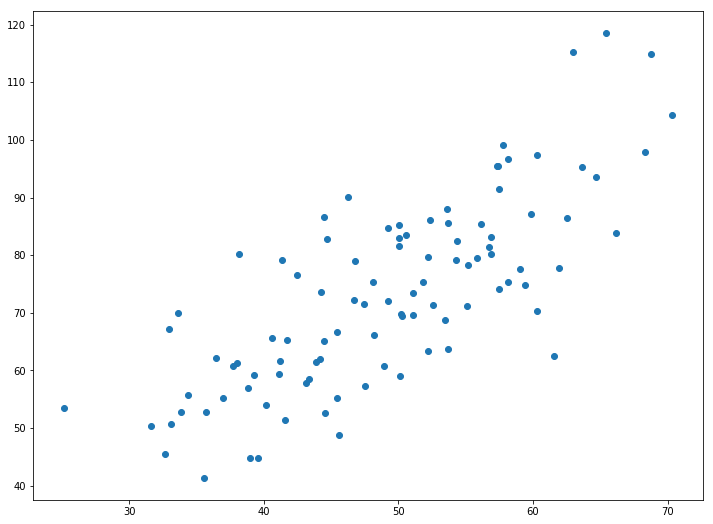

In [31]:
# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y);


In [32]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print("Model slope:    ", m)
print("Model intercept:", c)

print("New Prediction for X=134 =", m*134+c)

Model slope:     1.287357370010931
Model intercept: 9.908606190326509
New Prediction for X=134 = 182.41449377179129


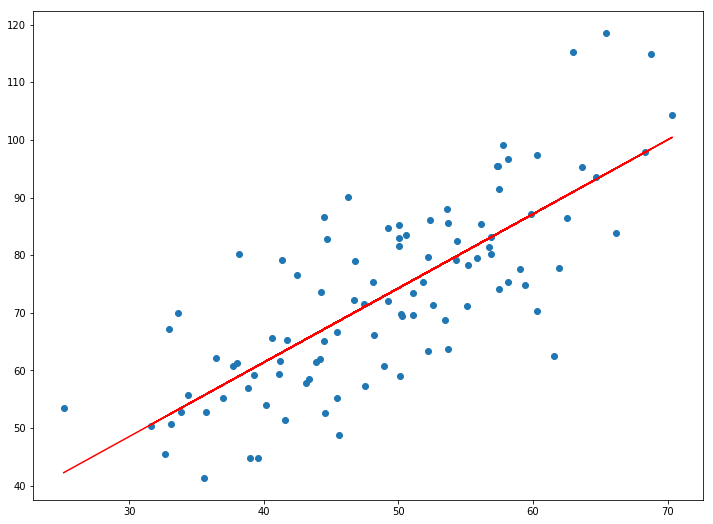

In [33]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y); # actual
plt.plot(X,Y_pred, color='red');



## Linear Regression using Gradient Descent   
\\[ Y = mX + c \\]  

Our challenege today is to determine the value of **m** and **c**, such that the line corresponding to those values is the best fitting line or gives the minimum error.  
## Loss function  
 
We will use the Mean Squared Error function to calculate the loss. There are three steps in this function:
1. Find the difference between the actual y and predicted y value(y = mx + c), for a given x.  
2. Square this difference.
3. Find the mean of the squares for every value in X.  
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar y_i)^2\\]  

Here $y_i$ is the actual value and $\bar y_i$ is the predicted value. Lets substitue the value of $\bar y_i$
\\[ E = \frac{1}{n} \sum_{i=0}^n (y_i - (mx_i + c))^2\\]


## The Gradient Descent Algorithm  
Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.  
**Understanding Gradient Descent**  

1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of **m** changes with each step. L could be a small value like 0.0001 for good accuracy. 
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value **D**.  
\\[ D_m = \frac{1}{n} \sum_{i=0}^n 2(y_i - (mx_i + c))(-x_i) \\]
\\[ D_m = \frac{-2}{n} \sum_{i=0}^n x_i(y_i - \bar y_i) \\]  
$D_m$ is the value of the partial derivative with respect to **m**. Similarly lets find the partial derivative with respect to **c**, $D_c$ :  
\\[ D_c = \frac{-2}{n} \sum_{i=0}^n (y_i - \bar y_i) \\]
3. Now we update the current value of **m** and **c** using the following equation: 
\\[ m = m - L \times D_m\\]  
\\[ c = c - L \times D_c\\]  
4. We repeat this process untill our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of **m** and **c** that we are left with now will be the optimum values.  
  


## Implementing the Model  
Now let's convert everything above into code and see our model in action !


In [34]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000# The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print("Model slope:    ", m)
print("Model intercept:", c)

print("New Prediction for X=134 =", m*134+c)

Model slope:     1.4796491688889395
Model intercept: 0.10148121494753726
New Prediction for X=134 = 198.37446984606544


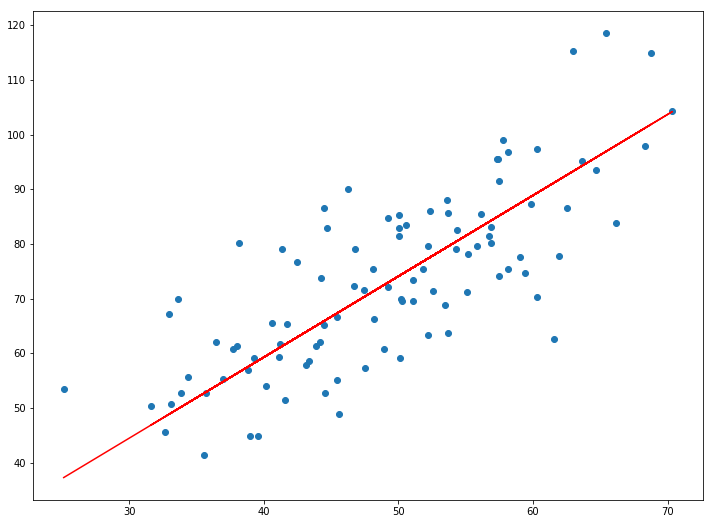

In [35]:
Y_pred = m*X + c

plt.scatter(X, Y);
plt.plot(X,Y_pred, color='red');



## Linear Regression using Scikit learn's module 

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X = data.iloc[:, 0].values.reshape(-1, 1) # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

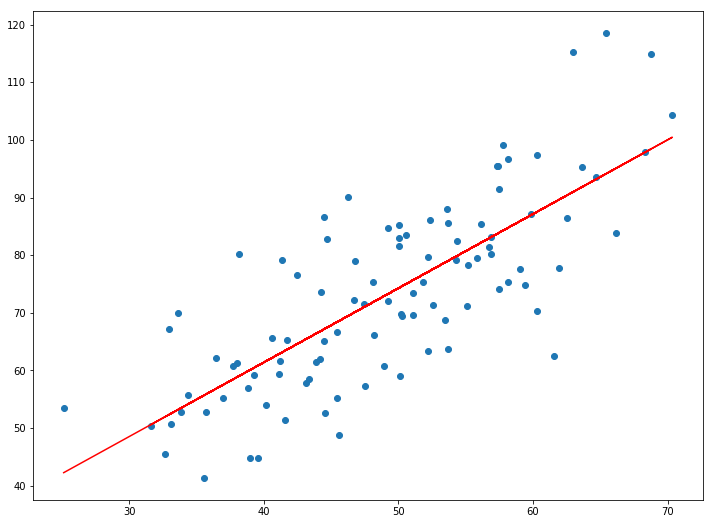

In [38]:
plt.scatter(X, Y);
plt.plot(X, Y_pred, color='red');

In [41]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

print("New Prediction for X=134 =", model.predict(np.array([134]).reshape(-1, 1))[0])

Model slope:     [1.28735737]
Model intercept: [9.90860619]
New Prediction for X=134 = [182.41449377]
